In [10]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils

In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
input_shape = (28, 28, 1)

In [14]:
x_train = x_train / 255
x_test = x_test / 255

In [15]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [44]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    Flatten(),
    Dense(512, activation= 'relu'),
    Dense(10, activation= 'softmax')])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [56]:
%%time

history = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data=(x_test, y_test_cat), validation_split = 0.2)


Epoch 1/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.1122 - val_accuracy: 0.9824
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.1040 - val_accuracy: 0.9838
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.1292 - val_accuracy: 0.9798
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.1409 - val_accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.1365 - val_accuracy: 0.9819
CPU times: total: 3min 58s
Wall time: 1min


In [57]:
accur = model.evaluate(x_test, y_test_cat)
print(f' точность прогноза тестирования данных {round(accur[1] * 100, 4)}%')

  1/313 [..............................] - ETA: 8s - loss: 8.0388e-06 - accuracy: 1.0000

313/313 [==============================] - 1s 2ms/step - loss: 0.1365 - accuracy: 0.9819
 точность прогноза тестирования данных 98.19%


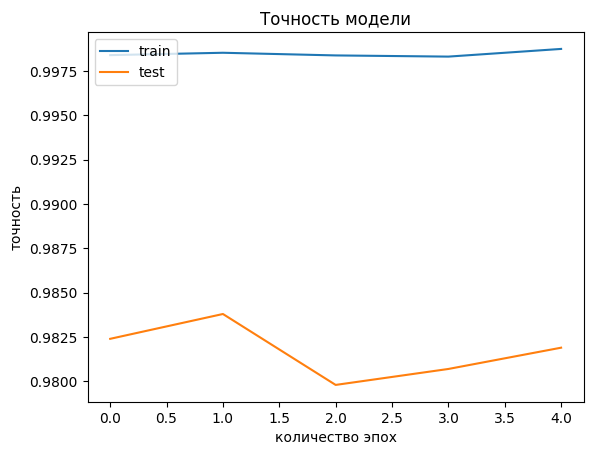

In [58]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Точность модели")
plt.ylabel("точность")
plt.xlabel("количество эпох")
plt.legend(["train", "test"], loc="upper left")
plt.show()

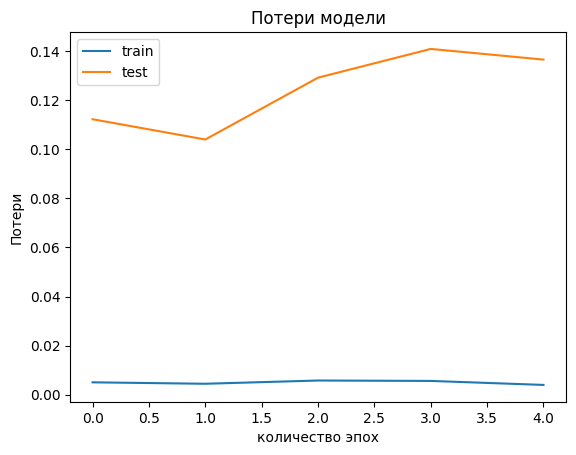

In [59]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Потери модели")
plt.ylabel("Потери")
plt.xlabel("количество эпох")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [68]:
from tensorflow.keras.preprocessing import image

img = image.load_img("./test_images_folder/7.png")
img = img.resize((28, 28))
img = img.convert("L")
img = np.array(img)
img = img.reshape(1, 28, 28)
img = img / 255.0
prediction = model.predict(img)
prediction = np.argmax(prediction)
print("цифра:", prediction)

1/1 [==============================] - 0s 24ms/step
цифра: 7
